In [28]:
from astropy.io import fits
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
from photutils import CircularAperture
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import aperture_photometry
import numpy as np
from scipy.optimize import leastsq
import pylab as pylab
from matplotlib.mlab import find
from scipy.optimize import fsolve
from scipy import interpolate
from astropy import wcs
from astropy import coordinates
import astropy.units as u
from astroquery.simbad import Simbad

ImageOne = 'multidayone.fits'
ImageTwo = 'multidaytwo.fits'
ImageThree = 'multidaythree.fits'
ImageFour = 'multidayfour.fits'
ImageFive = 'multidayfive.fits'
ImageSix = 'multidaysix.fits'
ImageSeven = 'multidayseven.fits'
ImageEight = 'multidayeight.fits'
ImageNine = 'multidaynine.fits'
ImageTen = 'multidayten.fits'
ImageEleven = 'multidayeleven.fits'
ImageTwelve = 'multidaytwelve.fits'
ImageThirteen = 'multidaythirteen.fits'
ImageFourteen = 'multidayfourteen.fits'

AM0 = 21 #actual mag of standard star one
AM1 = 23#actual mag of standard star two
AM2 = 19#actual mag of standard star three
AM3 = 15.1
AM4 = 22 #BUT VARIABLE
AM5 = 24
AM6 = 16.3
AM7 = 15.8
L = [AM0, AM1, AM2, AM3, AM4, AM5, AM6, AM7]

FWHM = 7.0
MinSep = 0.8 #sets value for discriminating sources
N = 14 #number of images minus 1 as it starts from zero
t = [ImageOne, ImageTwo, ImageThree, ImageFour, ImageFive, ImageSix, ImageSeven, 
    ImageEight, ImageNine, ImageTen, ImageEleven, ImageTwelve, ImageThirteen, ImageFourteen]
imno = 0
imagedata = dict()
sources = dict()
Date = dict()
STD = dict()
Median = dict()


for imno in range(0, N):
    hdu_list = fits.open(t[imno])
    imagedata[imno] = hdu_list[0].data
    mean, median, std = sigma_clipped_stats(imagedata[imno], sigma=3.0, iters=5) 
    Median[imno] = median
    STD[imno] = std
    daofind = DAOStarFinder(fwhm=FWHM, threshold=5.*std)
    sources[imno] = daofind(imagedata[imno] - median)
    Date[imno] = hdu_list[0].header['MJD-OBS']
    
    #print(Date[imno])
    #print(sources[imno]) 
    #print(std)


ImportError: No module named 'astroquery'

In [4]:
#print(STD)
num = 0

L = [AM0, AM1, AM2, AM3, AM4, AM5, AM6, AM7]
T = [0] * N
for num in range(0, N):
    for z in range(0, 3):
        g = L[z] - sources[num][z][10]
        print(g)
        T[num] = T[num] + g
    K = [x/3 for x in T]
print(K)
print(T)
print(T[13])
C = np.mean(K)
print(C)

24.3936387726
24.2624370422
24.3972961143
24.3957681403
24.3695738963
24.3962308346
24.3705215007
24.3119201377
24.3990149407
21.0307268226
26.3839075328
20.2485807466
21.0039370368
26.3958802404
20.2490391506
24.3930084543
24.3173987723
24.3991390206
24.3804819394
24.3564014207
24.3969413365
24.3838131714
24.3344792207
24.3982670439
24.3870729212
24.4419063907
24.3966991077
21.0139359527
26.3973131677
20.288745548
24.3934541466
24.2652145763
24.4009766225
24.3749209604
24.3151816915
24.3998087007
24.3758808629
24.3702206484
24.3974816802
24.3894964585
24.2621769391
24.3999106346
[24.351123976382425, 24.387190957058465, 24.360485526354321, 22.554405033999569, 22.549618809297851, 24.369848749076468, 24.377941565546248, 24.372186478662005, 24.408559473194781, 22.566664889501073, 24.353215115144355, 24.36330378421421, 24.381194397157429, 24.350528010722218]
[73.053371929147275, 73.161572871175395, 73.081456579062959, 67.663215101998702, 67.648856427893548, 73.109546247229403, 73.133824696

In [372]:
print(Median)
sources[0]

{0: 984.0, 1: 984.0, 2: 984.0, 3: 984.0, 4: 984.0, 5: 984.0, 6: 984.0, 7: 984.0, 8: 984.0, 9: 984.0, 10: 984.0, 11: 984.0, 12: 984.0, 13: 984.0}


<Table length=8>
  id    xcentroid     ycentroid   ...   peak       flux           mag      
int64    float64       float64    ... float64    float64        float64    
----- ------------- ------------- ... ------- ------------- ---------------
    1  180.13949387 862.683050532 ...   396.0 22.7748491471  -3.39363877259
    2 309.920710437 950.435395087 ...    69.0 3.19870962318  -1.26243704224
    3 487.216901308 954.825529789 ...  2632.0 144.184456838  -5.39729611432
    4 77.1272715624 958.469118468 ... 60594.0 4765.85126137  -9.19535121055
    5   254.3599503 996.969905741 ...   154.0  8.5530658926  -2.33030454459
    6 429.953032279 1080.60162861 ...    32.0 1.53824053068 -0.467560625692
    7 112.943237306 1115.16114848 ... 30381.0 1731.41086017  -8.09600034319
    8 424.258391292 1156.74592831 ... 49122.0 2737.48409133  -8.59337900997

0.00842138312663
Object 0
0.0545795950684
Object 1
0.00172319171787
Object 2
0.000286760705502
Object 3
variable object 4


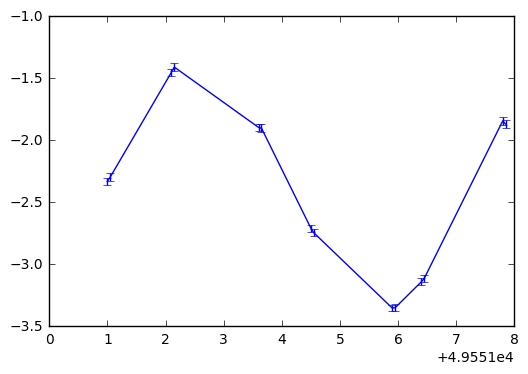

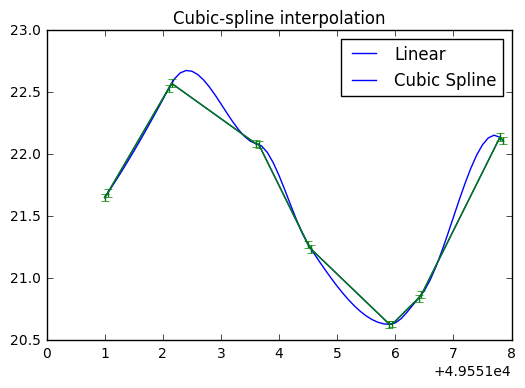

[ 0.05616829 -0.04246439]


NameError: name 'Simbad' is not defined

In [25]:
n = 0 # obsolete!
x = 0 #cycles through possible objects starting at zero
Q =[0] #used to define corresponding objects
num = 0 #used for sources[]

#Q = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#Q = [a, b, c, d, e, f, g, h, i, j, k, l, m] #sets itteration letter

y = (sources[num][-1][0]-1)
ystart = (sources[0][-1][0])

#av = dict()
#tot = dict()
#Detect = dict()
#mag = dict()
#finalstd = dict()
#totstd = dict()

av = [0] * ystart
tot = [0] * ystart
Detect = [0] * ystart
#mag = [0] * N
STD = [0] * N
totstd = [0] * ystart
finalstd = [0] * ystart
#error = [0]

for x in range(0, ystart):
    for num in range(0, N):#itterates over all images loaded
        y = (sources[num][-1][0])#-1) #appened y through the looop
        #K1 = AM1 - sources[num][0][10]
        for Q[n] in range(0, y): #change values of object depending
            #y = (sources[num][-1][0]-1)
            if ((sources[0][x][2] - sources[num][Q[n]][2])**2) < (0.8**2): #if its the same then stop
                #print(Q[n], num, x, y)
                tot[x] = tot[x] + (sources[num][Q[n]][10]) #calculate mag total
                Detect[x] = Detect[x] + 1 #number of detections
                #mag[num] = sources[num][Q[n]][10]
                #print(Detect[x], num)
                if num == 0:
                    DateObs = [Date[0]] #sets date for each new object and begging of sequence
                    mag = [sources[num][Q[n]][10]] #sets mag like above
                    error = [1/((sources[num][Q[n]][8] + Median[num])**0.5)]
                else:
                    DateObs.extend([Date[num]]) # appends date of observation and takes into account when the object isnt detected
                    mag.extend([sources[num][Q[n]][10]]) #appends mag
                    error.extend([1/((sources[num][Q[n]][8] + Median[num])**0.5)])
                break
            #else:
                #if Detect[x] == num:
                        #DateObs.extend([Date[num]])
                        #error.extend([1/(Median[num]**0.5)])
                        #mag.extend([C])
                        #Detect[x] = Detect[x] + 1
                #if Q[n] == (y - 1):
                    #k = k + 1 
                    #positions = [(sources[1][x][1], sources[1][x][2])]
                    #apertures = CircularAperture(positions, r = FWHM)
                    #data = imagedata[num]
                    #mean, median, std = sigma_clipped_stats(data, sigma=3.0, iters=5)
                    #error = (std**0.5)
                    #phot_table = aperture_photometry(data - median, apertures, error=error)
                    #print(phot_table)
                    #print(test)
                    #max_mag = -2.5*np.log((phot_table[0][3] - phot_table[0][4])/(5*std*(FWHM**2)*np.pi))
                    #print(max_mag)
                    
    
    av[x] = tot[x]/Detect[x]
    STD = [((z - av[x])**2) for z in mag]
    totstd[x] = sum(STD)
    finalstd[x] = (totstd[x]/Detect[x])**0.5
    if finalstd[x] > 0.1:
        print('variable object', x)
        plt.errorbar(DateObs, mag, yerr=error)
        plt.show()
        
        X = DateObs
        #mean = np.mean(mag)
        Y = [w + C for w in mag]

        tck = interpolate.splrep(X, Y, s=0)
        Xnew = np.arange(DateObs[0], DateObs[-1], 0.1)
        Ynew = interpolate.splev(Xnew, tck, der=0)
        plt.figure()
        plt.plot(Xnew, Ynew, X, Y, 'b')
        plt.errorbar(X, Y, yerr=error)
        plt.legend(['Linear', 'Cubic Spline'])
        plt.title('Cubic-spline interpolation')
        plt.show()

        hdulist = fits.open(t[num])
        w = wcs.WCS(hdulist[0].header)
        pixcrd = np.array([[float(sources[0][0][1]), float(sources[0][0][2])], [float(sources[0][1][1]), float(sources[0][1][2])], [float(sources[0][x][1]), float(sources[0][x][2])]], np.float_)#pixcrd = np.array([float(sources[num][Q[n]][1]), float(sources[num][Q[n]][2])])#, np.float_)
        world = w.wcs_pix2world(pixcrd, 0)
        print(world[2])
        #c = coordinates.SkyCoord( world[2][0], world[2][1], unit=(u.deg, u.deg), frame='galactic', radius='0d0m2s')
                                 
        #r = 5 * u.arcminute
        result_table = Simbad.query_region(coordinates.SkyCoord( world[2][0], world[2][1], unit=(u.deg, u.deg), frame='galactic', radius='0d0m2s'))
        result_table.pprint(show_unit=True, max_width=80, max_lines=5)
        
        #f = lambda q: interpolate.splev(q, tck, der=0)
        #from scipy.optimize import fsolve
        #A = np.array([DateObs[0], DateObs[-1]])
        #zeros = fsolve(f, A)
        #period = zeros[1] - zeros[0]
        #print('period =', period , 'days')

    print(finalstd[x])
    print('Object', x) # tot[x]/Detect[x], finalstd[x])
    
    


In [400]:
for Q[n] in range(0, y): #change values of object depending
        if ((sources[0][3][2] - sources[num][Q[n]][2])**2) < (0.8**2): #if its the same then stop
            break
        else:
            print('object not found')

y = (sources[num][-1][0]-1) #appened y through the loop
print(Q[n], n, num, 3, y)        #print all the way through

object not found
object not found
object not found
3 0 13 3 7


In [182]:
print(DateObs[0])

49551.9999131944


In [157]:
print(mag)

[-0.46756062569215334, -0.37004559759468714, -0.40700799987926695, -0.49170019089570499, -0.22220921331731483, -0.45737158639377795, -2.7088714246353645, -0.48082803488620252, -0.38058331458426731, -0.37874696858532364, -0.40385516892363638, -0.34350272961637779, -1.8448501188901094, -0.4543085995755281]


In [93]:
print(tot)

[-47.415158269312776, -18.393276181310501, -75.58347603228701, -128.72721882056072, -33.414291915663661, -4.8577200299442405, -113.33667359016559, -120.30119644356367]


In [115]:
print(tot)

[-47, 0, 0, 0, 0, 0, 0, 0]


In [137]:
print(Detect[5])

12


In [391]:
print(error)

[0.029643458336437611, 0.029814239699997198, 0.030671383606587218, 0.030860669992418384, 0.030443128277399149, 0.030443128277399149, 0.028867513459481284, 0.028724249481071301, 0.026938622922018266, 0.027027027027027029, 0.027671226645624276, 0.027777777777777776, 0.03059950306810523, 0.030414953233623677]


In [204]:
from statistics import mode
sky = mode(data)
print(sky)

TypeError: unhashable type: 'numpy.ndarray'

In [333]:
positions1 = [(sources[0][0][1], sources[0][0][2])]#
positions2 = [(sources[0][1][1], sources[0][1][2])]#
positions3 = [(sources[0][7][1], sources[0][7][2])]#
apertures1 = CircularAperture(positions1, r = FWHM)#
apertures2 = CircularAperture(positions2, r = FWHM)#
apertures3 = CircularAperture(positions3, r = FWHM)#
dataone = imagedata[0]
mean, median, std = sigma_clipped_stats(dataone, sigma=3.0, iters=5)#

phot_table1 = aperture_photometry(data - median, apertures1)#, error=error)
phot_table2 = aperture_photometry(data - median, apertures2)#, error=error)
phot_table3 = aperture_photometry(data - median, apertures3)#, error=error)

print(phot_table3[0][3])
a = phot_table1[0][3]
b = phot_table2[0][3]
c = phot_table3[0][3]
print(phot_table1, phot_table2, phot_table3)

#flx1 = (a/(((FWHM/2)**2)*3.14))#
#flx2 = (b/(((FWHM/2)**2)*3.14))#
#flx3 = (c/(((FWHM/2**2)*3.14))#

#print(max_mag1, max_mag2, max_mag3)         
#sources[0][0]
#a = (phot_table[0][3]/sources[0][0][9])
#print(a)


900823.656736
 id      xcenter            ycenter       aperture_sum
           pix                pix                     
--- ------------------ ----------------- -------------
  1 180.13949386961602 862.6830505317301 7656.39673759  id      xcenter          ycenter       aperture_sum
           pix              pix                     
--- ----------------- ---------------- -------------
  1 309.9207104366221 950.435395087184 1110.01025685  id      xcenter           ycenter       aperture_sum
           pix               pix                     
--- ------------------ ---------------- -------------
  1 424.25839129194867 1156.74592831201 900823.656736


In [368]:
flux1 = (phot_table1[0][3]/81)#
flux2 = (phot_table2[0][3]/81)#
flux3 = (phot_table3[0][3]/81)#

t1 = -2.5*(np.log(phot_table1[0][3]/40))
t2 = -2.5*(np.log(phot_table2[0][3]/40))        
t3 = -2.5*(np.log(phot_table3[0][3]/40))  

print(t1, t2, t3)  
print(AM1 + t1, AM2 + t2, AM3 + t3)
print(flux1, flux2, flux3)

-13.1360432454 -8.30811270138 -25.0554633596
9.86395675461 10.6918872986 -9.95546335957
94.5234165134 13.7038303314 11121.2797128


In [327]:
print(AM1, AM2, AM3)

22 16.3 19


In [321]:
-2.5*np.log(7656/81)

-11.371989446150879

In [322]:
-2.5*np.log(1110/81)

-6.544165349084853

In [282]:
-2.5*np.log(900823/81)

-23.291537285572119

In [291]:
for t in range(0, 7):
    a = (sources[0][t][9]/sources[0][t][8])
    print(a)

0.057512245321
0.0463581104809
0.0547813285857
0.0786521975999
0.055539388913
0.0480700165838
0.0569899233128
